#### Importation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.optimize import curve_fit

In [2]:
from utils.layers import filter_creation

In [3]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# colors = ['#EFB475', '#477081', '#AEC5FB', '#F77B7F']
colors = ['#EFB475', '#477081', '#F0F3FC', '#F77B7F']
cmap = ListedColormap(colors)
bounds = [-1.5, -0.5, 0.5, 1.5, 2.5]
norm = BoundaryNorm(bounds, cmap.N)

In [4]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

#### MC Simulation

In [5]:
def calcular_energia(rede):
    energia = 0
    tamanho = len(rede)
    for i in range(tamanho):
        for j in range(tamanho):
            S = rede[i, j]
            if S == 0:
                continue

            # Interacao Vizinhos
            vizinhos = [
                rede[(i+1) % tamanho, j],
                rede[i, (j+1) % tamanho],
                rede[(i-1) % tamanho, j],
                rede[i, (j-1) % tamanho]
            ]

            
            for V in vizinhos:
                if S == 1:  # CBM
                    if V == -1:  # CBM com MP
                        energia += E_CBMP
                    # elif V == 2:  # CBM com espid
                    #     energia += E_CBMS
                    # elif V == 1:  # CBM com CBM
                    #     energia += E_CBMCBM
                elif S == 2:  # Espid
                    if V == -1:  # Espid com MP
                        energia += E_SMP
                #     elif V == 2:  # Espid com espid
                #         energia += E_SS
                # elif S == -1:  # MP
                #     if V == -1:  # MP com MP
                #         energia += E_MPMP
    
    # return energia/(len(rede)**2)
    return energia/2

In [9]:
def monte_carlo(rede, mps_count, passos, T, tamanho_limite_mp=50):
    
    tamanho = len(rede)
    mps_size = []
    
    for passo in range(passos):
        
        i = np.random.randint(0, tamanho)
        j = np.random.randint(0, tamanho)
        # tamanho_mp = np.random.randint(0, tamanho_limite_mp)
        tamanho_mp = tamanho_limite_mp
        S = rede[i, j]
        
        rede_teste = rede.copy()

        kB=8.617333e-5
        beta = kB*T

        if i+tamanho_mp < tamanho and j+tamanho_mp < tamanho:
            
            rede_teste[i:i+tamanho_mp,j:j+tamanho_mp] = 1

            energia_atual = calcular_energia(rede)
            energia_teste = calcular_energia(rede_teste)
            
            energia_atual = np.exp(-beta*(-energia_atual))
            energia_teste = np.exp(-beta*(-energia_teste))

            if energia_teste > energia_atual:
                rede[i:i+tamanho_mp,j+j:tamanho_mp] = S
                
            elif np.random.random() < 0.1:
                rede[i:i+tamanho_mp,j+j:tamanho_mp] = S
            else:
                mps_count += 1
                mps_size.append(tamanho_mp)
                rede = rede_teste

    return rede,mps_count,mps_size

In [10]:
E_CBMP = -0.58
E_SMP = -0.46/2

E_CBMS = -0.1
E_CBMCBM = -0.1
E_SS = -0.1
E_MPMP = -0.1

#### Running

In [12]:
it = 1000
e_config = {}
energias,mps_list,mps_size_list = [],[],[]

for n in range(it):

    camada = filter_creation(tamanho_rede = 120,
                porosidade = 0.63,
                camadas = 6,
                diametro_fibra = 2,
                concentracao_cbm = 0.3,
                tamanho_cbm = 1,
                CBM=True,
                display=False)[0]

    mps_count = 0

    rede,mps_count,mps_size = monte_carlo(camada, mps_count, passos=50, tamanho_limite_mp=12, T=300)
    energia_atual = calcular_energia(rede)

    mps_size_list.append(mps_size)

    energias.append(energia_atual)
    mps_list.append(mps_count)

    e_config.update({n:[energia_atual,rede]})

Filtro criado, 0.61
Filtro criado, 0.61
Filtro criado, 0.8
Filtro criado, 0.66
Filtro criado, 0.77
Filtro criado, 0.62
Filtro criado, 0.65
Filtro criado, 0.54
Filtro criado, 0.68
Filtro criado, 0.9
Filtro criado, 0.58
Filtro criado, 0.54
Filtro criado, 0.61
Filtro criado, 0.56
Filtro criado, 0.75
Filtro criado, 0.89
Filtro criado, 0.56
Filtro criado, 0.64
Filtro criado, 0.62
Filtro criado, 0.59
Filtro criado, 0.85
Filtro criado, 0.67
Filtro criado, 0.61
Filtro criado, 0.54
Filtro criado, 0.61
Filtro criado, 0.6
Filtro criado, 0.81
Filtro criado, 0.61
Filtro criado, 0.74
Filtro criado, 0.58
Filtro criado, 0.69
Filtro criado, 0.62
Filtro criado, 0.71
Filtro criado, 1.09
Filtro criado, 0.69
Filtro criado, 1.13
Filtro criado, 0.85
Filtro criado, 0.69
Filtro criado, 0.66
Filtro criado, 0.8
Filtro criado, 0.77
Filtro criado, 0.72
Filtro criado, 0.85
Filtro criado, 0.8
Filtro criado, 0.65
Filtro criado, 1.01
Filtro criado, 0.71
Filtro criado, 0.76
Filtro criado, 1.01
Filtro criado, 0.83
Filtr

In [16]:
np.mean(mps_list),np.std(mps_list)

(12.492, 2.870877217855198)

#### Simulation Results

C:\Users\pedro220068\AppData\Local\Temp\ipykernel_30628\3598151523.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_plot, gaussian(x_plot, *popt), 'r-', label='Gaussian Fit',color='#E0218A')


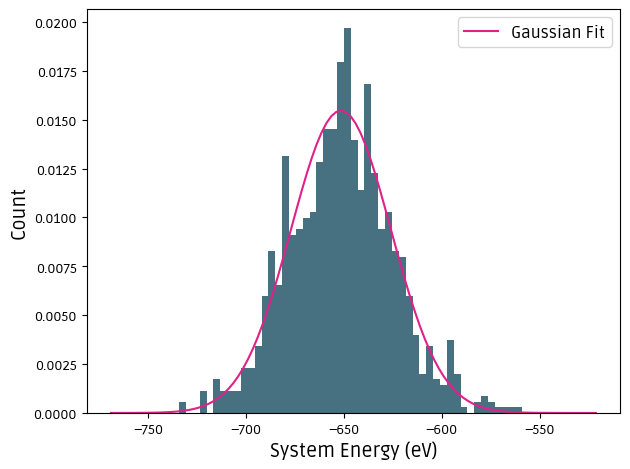

In [120]:
count, bins, _ = plt.hist(energias,density=True,bins=50,color='#477081')
bin_centers = 0.5 * (bins[1:] + bins[:-1])

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

popt, pcov = curve_fit(gaussian, bin_centers, count, p0=[1., np.mean(energias), np.std(energias)])

x_plot = np.linspace(min(bin_centers)*1.05,max(bin_centers)*0.93,100)
plt.plot(x_plot, gaussian(x_plot, *popt), 'r-', label='Gaussian Fit',color='#E0218A')

plt.legend(fontsize=12)
plt.xlabel('System Energy (eV)',fontsize=14),plt.ylabel('Count',fontsize=14)

plt.tight_layout()
# plt.savefig('results/MC_sim.png',dpi=800,transparent=True)

plt.show()

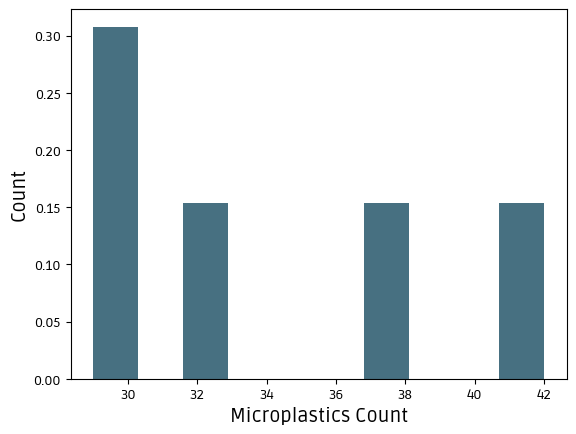

In [35]:
plt.hist(mps_list,color='#477081',density=True)
plt.xlabel('Microplastics Count',fontsize=14),plt.ylabel('Count',fontsize=14)

# plt.savefig('results/MC_sim_MPs.png',dpi=800,transparent=True)

plt.show()

In [115]:
mps_size_e = {}
for e,mp in zip(energias,mps_list):
    if mp not in mps_size_e:
        mps_size_e[mp] = [e]
    else:
        mps_size_e[mp].append(e)

In [116]:
kB = 8.617333e-5
T = 297.15
beta = kB*T

In [117]:
from scipy.optimize import curve_fit

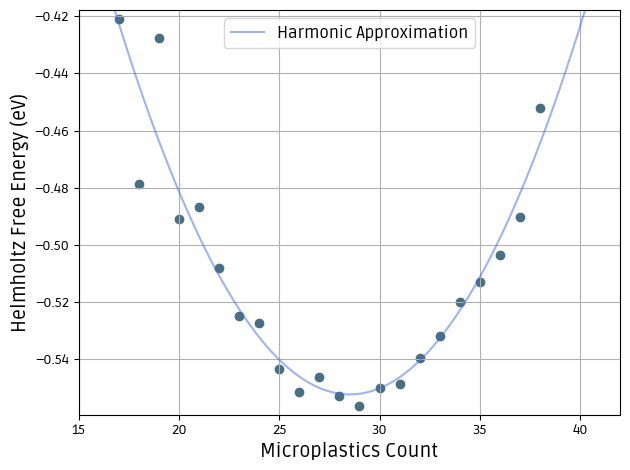

In [125]:
k_list = []
F_list = []
mu = 2.6e20*1e-21

for k,v in mps_size_e.items():

    partition_function = 0
    for v_i in v:
        partition_function += np.exp(-beta*(v_i))
    
    F = -beta*np.log(partition_function - mu*k)
    
    k_list.append(k)
    F_list.append(F)
    # plt.scatter(k,F,color='#477081')

    # plt.errorbar(k,np.mean(v),yerr=np.std(v),capsize=3,fmt="r--o",color='#477081',ecolor = "black")

# plt.ylim(-780,-625)

def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

initial_parameters = [-0.5,-0.5,min(k_list)]
popt, pcov = curve_fit(quadratic_function,k_list,F_list,p0=initial_parameters)
a, b, c = popt

x_fit = np.linspace(min(k_list)*0.8, max(k_list)*1.1, 100)
y_fit = quadratic_function(x_fit, a, b, c)

plt.plot(x_fit,y_fit,label='Harmonic Approximation',color='royalblue',alpha=0.5)
plt.scatter(k_list,F_list,color='#477081')

plt.xlim(15,42)
plt.ylim(min(F_list)-0.003,max(F_list)+0.003)
plt.xlabel('Microplastics Count',fontsize=14)
plt.ylabel('Helmholtz Free Energy (eV)',fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.tight_layout()

# plt.savefig('results/mps_energy.png',dpi=800,transparent=True)
plt.show()

In [131]:
list(y_fit).index(min(y_fit)),x_fit[52]

(52, 28.412121212121214)

In [17]:

for i,val in enumerate(e_config.values()):
    print(i,val[0])

0 -632.2400000000316
1 -695.0050000000285
2 -680.0600000000334
3 -635.2400000000305
4 -646.4550000000316
5 -619.3350000000303
6 -647.2550000000311
7 -673.50000000003
8 -669.3300000000314
9 -638.5000000000284
10 -635.275000000026
11 -599.43000000003
12 -639.370000000034
13 -630.0250000000347
14 -642.0000000000323
15 -622.6100000000265
16 -650.3800000000311
17 -662.0200000000359
18 -663.6050000000326
19 -649.2000000000296
20 -637.1750000000311
21 -682.3150000000329
22 -687.0800000000311
23 -680.2150000000336
24 -668.2400000000277
25 -617.2350000000281
26 -649.015000000029
27 -630.140000000029
28 -649.1450000000299
29 -640.110000000029
30 -657.280000000034
31 -673.0100000000291
32 -632.6750000000313
33 -686.9250000000355
34 -646.4800000000317
35 -659.090000000032
36 -648.1200000000306
37 -673.6200000000294
38 -652.6700000000347
39 -691.0450000000368
40 -650.1900000000295
41 -617.0550000000286
42 -624.9500000000289
43 -640.9900000000301
44 -666.2750000000324
45 -675.6600000000277
46 -627.5

In [26]:
# 231 -564.93, 16 -650.38, 267 -731.29

en,rede = e_config[267]

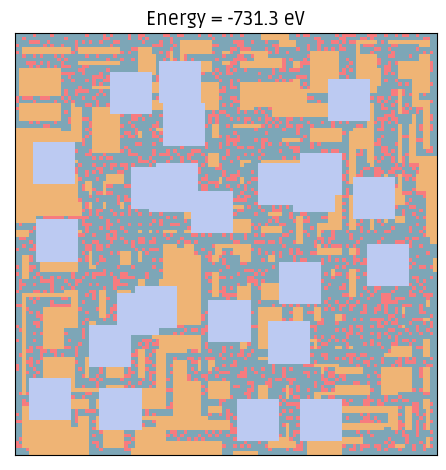

In [27]:
from matplotlib.colors import ListedColormap, BoundaryNorm

colors = ['#7DA6B7', '#EFB475', '#BCCAF2', '#F77B7F']

cmap = ListedColormap(colors)
bounds = [-1.5, -0.5, 0.5, 1.5, 2.5]
norm = BoundaryNorm(bounds, cmap.N)
cmap.set_bad(color='#acbdef')

rede = np.where(rede == -2, np.nan, rede)

cax = plt.imshow(rede, cmap=cmap, norm=norm)
# cbar = plt.colorbar(cax, ticks=[-1,0,1,2])
# cbar.set_ticklabels(['Fiber', 'Pore', 'Microplastic', 'BARBIE1'])

plt.title(f'Energy = {round(en,2)} eV',fontsize=14)

plt.xticks([])
plt.yticks([])

plt.savefig(f'results/{round(en)}ev.png',dpi=600,transparent=True)

plt.tight_layout()

In [275]:
bins_dic = {}
for i in range(1,len(bins)):
    bins_dic[f'{round(bins[i-1],4)} - {round(bins[i],4)}'] = []

for ec in e_config.values():
    for k in bins_dic.keys():
        splitted = k.split(' - ')
        min_lim = float(splitted[0]) 
        max_lim = float(splitted[1])
        if ec[0] >= min_lim and ec[0] <= max_lim:
            bins_dic[k].append(ec[1])

def calculate_rmsd(A, B):
    dif = A - B
    rmsd = np.sqrt(np.mean(np.sum(dif**2, axis=1)))
    return rmsd

rmsd_vals = []

for k,v in bins_dic.items():
    
    rmsd_results = []
    matrices = v.copy()

    for (i, j) in combinations(range(len(matrices)), 2):
        rmsd = calculate_rmsd(matrices[i], matrices[j]) * 100 / 120
        rmsd_results.append(rmsd)
    
    if len(rmsd_results) > 0:
        # rmsd_vals.append(np.mean(rmsd_results))
        rmsd_vals.append(rmsd_results)
    else:
        rmsd_vals.append(0)

In [276]:
bin_rmsd = {}
for bin_key, rmsd_val in zip(bins_dic.keys(),rmsd_vals):
    bin_rmsd[bin_key] = rmsd_val

In [277]:
energy_intervals = []
rmsd_values = []

for energy_range, rmsd_list in bin_rmsd.items():
    if rmsd_list != 0:
        energy_min, energy_max = map(float, energy_range.split(' - '))
        energy_mean = (energy_min + energy_max) / 2
        
        energy_intervals.extend([energy_mean] * len(rmsd_list))
        rmsd_values.extend(rmsd_list)

df = pd.DataFrame({'Energy': energy_intervals, 'RMSD': rmsd_values})

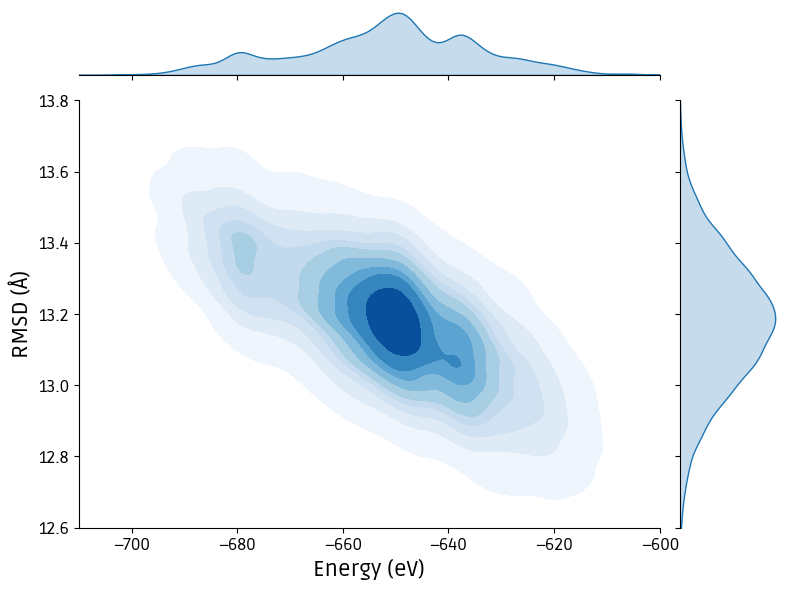

In [281]:
g = sns.jointplot(x = "Energy", y = "RMSD", 
              kind = "kde", data = df, fill=True,cmap="Blues", height=6,ratio=5)
g.fig.set_size_inches(8, 6)

plt.xlabel('Energy (eV)',fontsize=16)
plt.ylabel('RMSD (Å)',fontsize=16)

plt.xticks(fontsize=12),plt.yticks(fontsize=12)

plt.tight_layout()
plt.xlim(-710,-600),plt.ylim(12.6,13.8)

plt.savefig('results/KDE.png',dpi=800,transparent=True)
plt.show()

#### MPs Analysis

In [38]:
e_config = np.load('MC_states.npy',allow_pickle=True)